<a href="https://colab.research.google.com/github/patience275/bike-sharing-prediction/blob/main/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns',None)

In [2]:
df=pd.read_csv('/content/drive/MyDrive/dataaaaa/SeoulBikeData.csv', encoding='latin-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

## date

In [4]:
df['Date'].unique()

array(['01/12/2017', '02/12/2017', '03/12/2017', '04/12/2017',
       '05/12/2017', '06/12/2017', '07/12/2017', '08/12/2017',
       '09/12/2017', '10/12/2017', '11/12/2017', '12/12/2017',
       '13/12/2017', '14/12/2017', '15/12/2017', '16/12/2017',
       '17/12/2017', '18/12/2017', '19/12/2017', '20/12/2017',
       '21/12/2017', '22/12/2017', '23/12/2017', '24/12/2017',
       '25/12/2017', '26/12/2017', '27/12/2017', '28/12/2017',
       '29/12/2017', '30/12/2017', '31/12/2017', '01/01/2018',
       '02/01/2018', '03/01/2018', '04/01/2018', '05/01/2018',
       '06/01/2018', '07/01/2018', '08/01/2018', '09/01/2018',
       '10/01/2018', '11/01/2018', '12/01/2018', '13/01/2018',
       '14/01/2018', '15/01/2018', '16/01/2018', '17/01/2018',
       '18/01/2018', '19/01/2018', '20/01/2018', '21/01/2018',
       '22/01/2018', '23/01/2018', '24/01/2018', '25/01/2018',
       '26/01/2018', '27/01/2018', '28/01/2018', '29/01/2018',
       '30/01/2018', '31/01/2018', '01/02/2018', '02/02

## rented bikes

In [5]:
df['Rented Bike Count'].unique()

array([ 254,  204,  173, ..., 1538,  804,  595])

In [6]:
df['Rented Bike Count'].describe()

,Rented Bike Count
count,8760.000000
mean,704.602055
std,644.997468
min,0.000000
25%,191.000000
50%,504.500000
75%,1065.250000
max,3556.000000


In [7]:
rbc=df['Rented Bike Count'].value_counts()
rbc

,count
Rented Bike Count,
0,295
122,19
223,19
262,19
165,18
...,...
1907,1
1228,1
1316,1


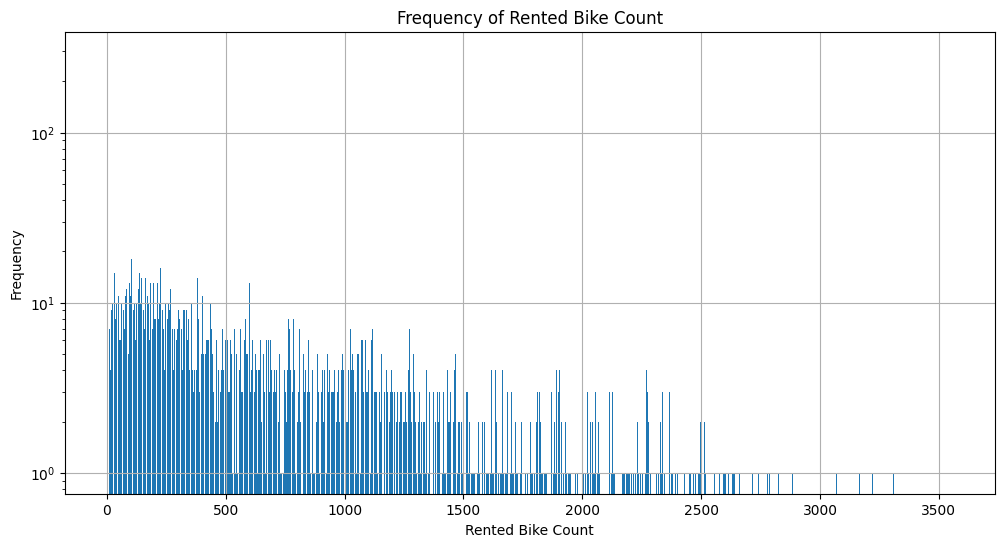

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.bar(rbc.index,rbc.values)
plt.yscale('log')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.title('Frequency of Rented Bike Count')
plt.grid(True)
plt.show()

## Temperature(°C)

In [9]:
df['Temperature(°C)'].unique()

array([ -5.2,  -5.5,  -6. ,  -6.2,  -6.4,  -6.6,  -7.4,  -7.6,  -6.5,
        -3.5,  -0.5,   1.7,   2.4,   3. ,   2.1,   1.2,   0.8,   0.6,
         0. ,  -0.3,  -0.8,  -0.9,  -1.3,  -1.8,  -2.2,  -2.9,  -3.8,
        -4. ,  -4.3,  -4.4,  -4.2,  -0.4,   1.9,   4.3,   6. ,   7.3,
         7.6,   6.4,   5.5,   5. ,   4.6,   4.1,   3.5,   4. ,   3.9,
         3.3,   3.4,   3.1,   3.2,   4.4,   5.1,   5.8,   6.8,   8. ,
         6.7,   5.7,   5.2,   4.7,   4.2,   3.6,   2.8,   2. ,   0.2,
        -1.5,  -1.1,   0.1,  -0.1,  -0.2,  -2.1,  -3.6,  -4.6,  -5.3,
        -5.8,  -6.1,  -6.8,  -6.9,  -7.2,  -7.5,  -8.1,  -3.9,  -2.3,
        -1.6,  -0.7,  -2.6,  -3.2,  -3.7,  -2.8,  -2.5,  -3. ,  -3.4,
        -3.3,   1.6,   5.3,   1.1,   1.3,   1.4,   1.5,   1. ,   0.3,
         2.3,   3.7,   0.7,  -1.4,  -2.7,  -4.8,  -7. ,  -6.7,  -2. ,
        -1.7,  -2.4,  -3.1,  -4.1,  -4.7,  -5.1,  -5.4,   2.5,   0.4,
         0.5,   0.9,   5.4,  -1. ,  -5.6,  -5.9,  -7.1,  -7.9,  -8.6,
        -9.3,  -9.7,

In [10]:
df['Temperature(°C)'].describe()

,Temperature(°C)
count,8760.000000
mean,12.882922
std,11.944825
min,-17.800000
25%,3.500000
50%,13.700000
75%,22.500000
max,39.400000


In [11]:
temp_count=df['Temperature(°C)'].value_counts()
temp_count

,count
Temperature(°C),
20.5,40
19.1,40
23.4,39
20.7,38
7.6,38
...,...
37.0,1
37.6,1
35.9,1


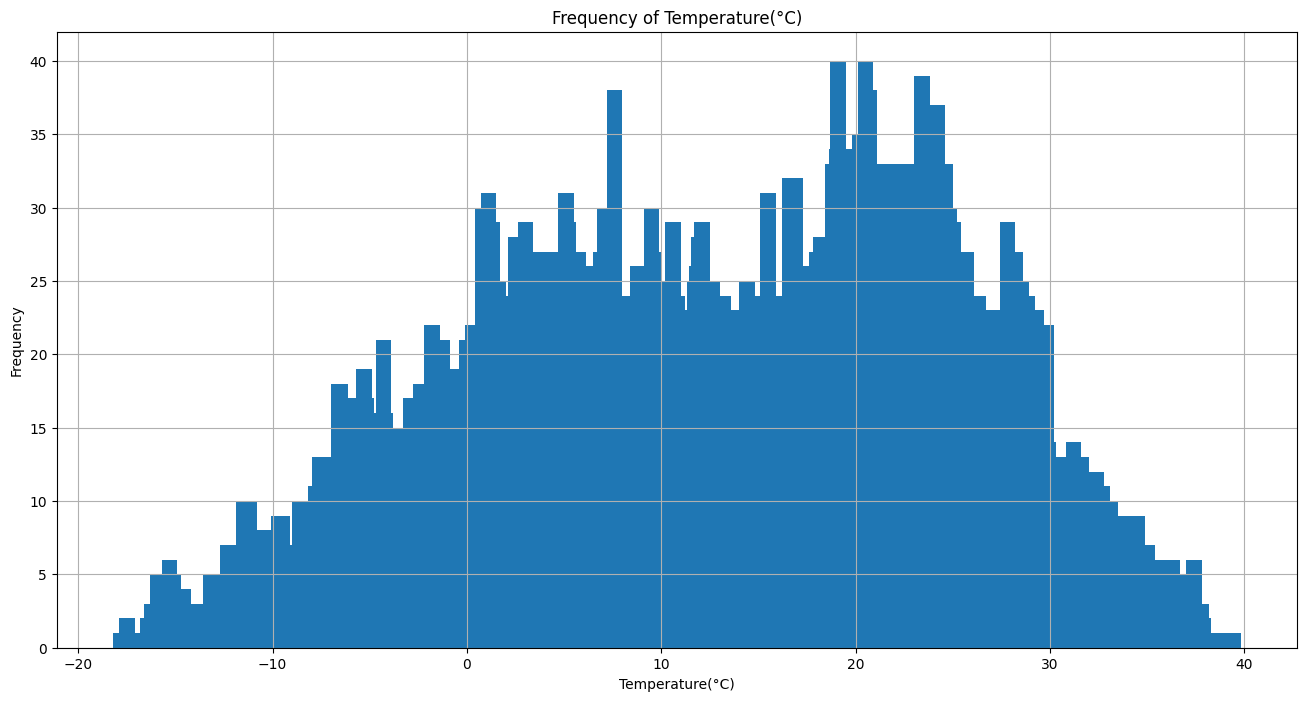

In [12]:
plt.figure(figsize=(16,8))
plt.bar(temp_count.index,temp_count.values)

plt.xlabel('Temperature(°C)')
plt.ylabel('Frequency')
plt.title('Frequency of Temperature(°C)')
plt.grid(True)
plt.show()

## Humidity(%)

In [13]:
df['Humidity(%)'].describe()

,Humidity(%)
count,8760.000000
mean,58.226256
std,20.362413
min,0.000000
25%,42.000000
50%,57.000000
75%,74.000000
max,98.000000


In [14]:
humidity=df['Humidity(%)'].value_counts()
humidity

,count
Humidity(%),
97,173
53,173
43,164
57,159
56,157
...,...
19,11
13,3
10,1


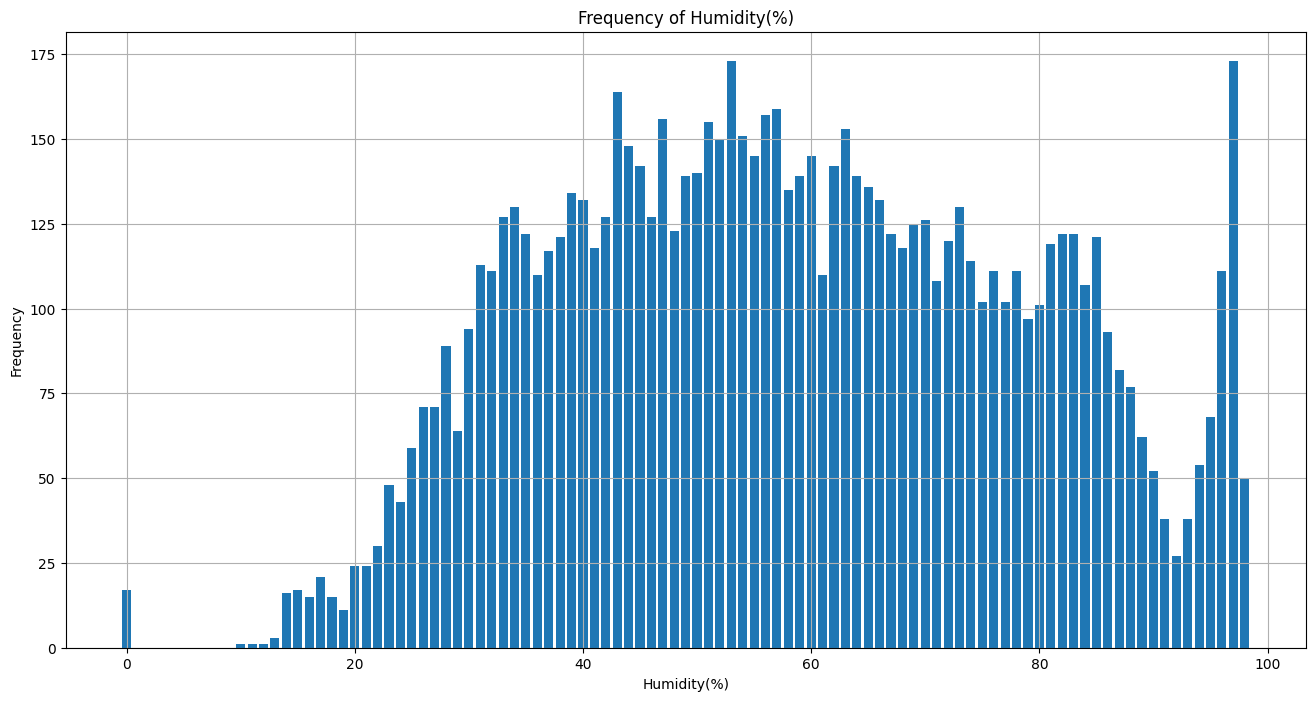

In [15]:
plt.figure(figsize=(16,8))
plt.bar(humidity.index,humidity.values)

plt.xlabel('Humidity(%)')
plt.ylabel('Frequency')
plt.title('Frequency of Humidity(%)')
plt.grid(True)
plt.show()

## Wind speed (m/s)

In [16]:
df['Wind speed (m/s)'].describe()

,Wind speed (m/s)
count,8760.000000
mean,1.724909
std,1.036300
min,0.000000
25%,0.900000
50%,1.500000
75%,2.300000
max,7.400000


In [17]:
windspeed_count=df['Wind speed (m/s)'].value_counts()
windspeed_count

,count
Wind speed (m/s),
1.1,420
1.2,403
0.9,388
1.0,388
0.8,385
...,...
7.2,1
6.1,1
7.3,1


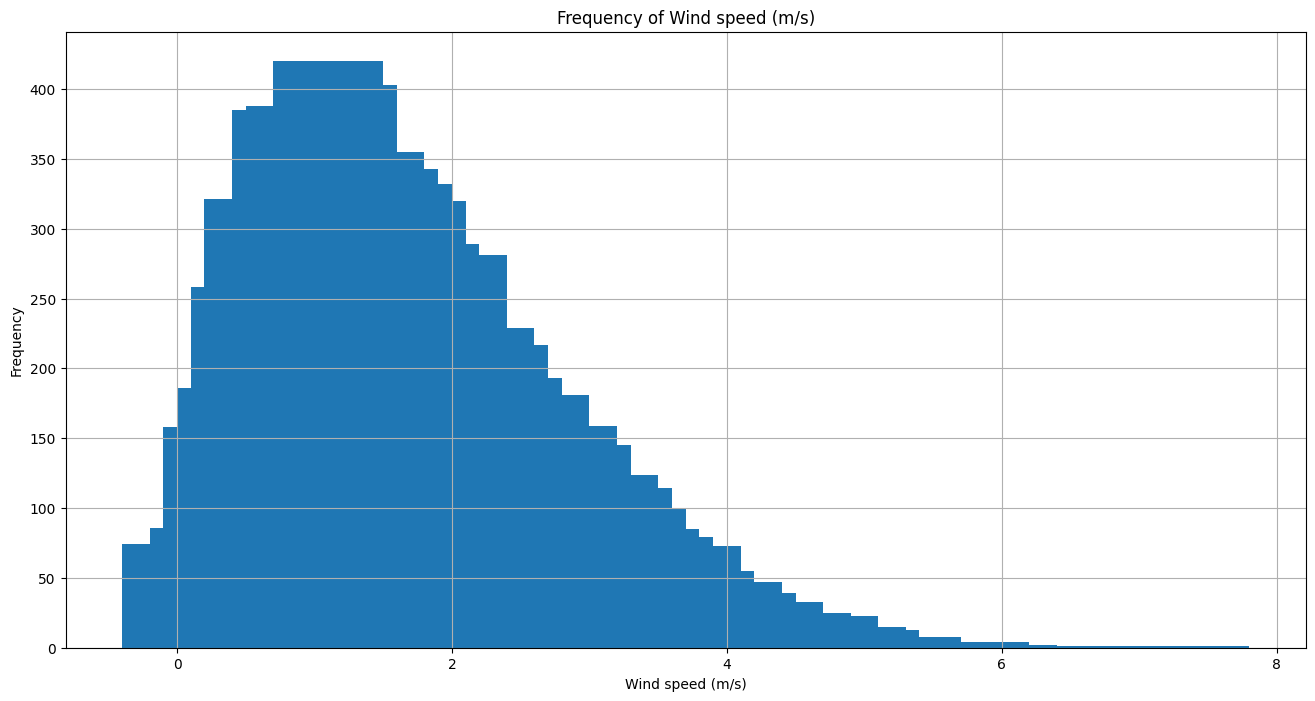

In [18]:
plt.figure(figsize=(16,8))
plt.bar(windspeed_count.index,windspeed_count.values)
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Frequency')
plt.title('Frequency of Wind speed (m/s)')
plt.grid(True)
plt.show()
#

## Visibility (10m)

In [19]:
df['Visibility (10m)'].describe()

,Visibility (10m)
count,8760.000000
mean,1436.825799
std,608.298712
min,27.000000
25%,940.000000
50%,1698.000000
75%,2000.000000
max,2000.000000


In [20]:
visibility_count=df['Visibility (10m)'].value_counts()
visibility_count

,count
Visibility (10m),
2000,2245
1995,34
1989,28
1985,28
1999,28
...,...
456,1
526,1
406,1


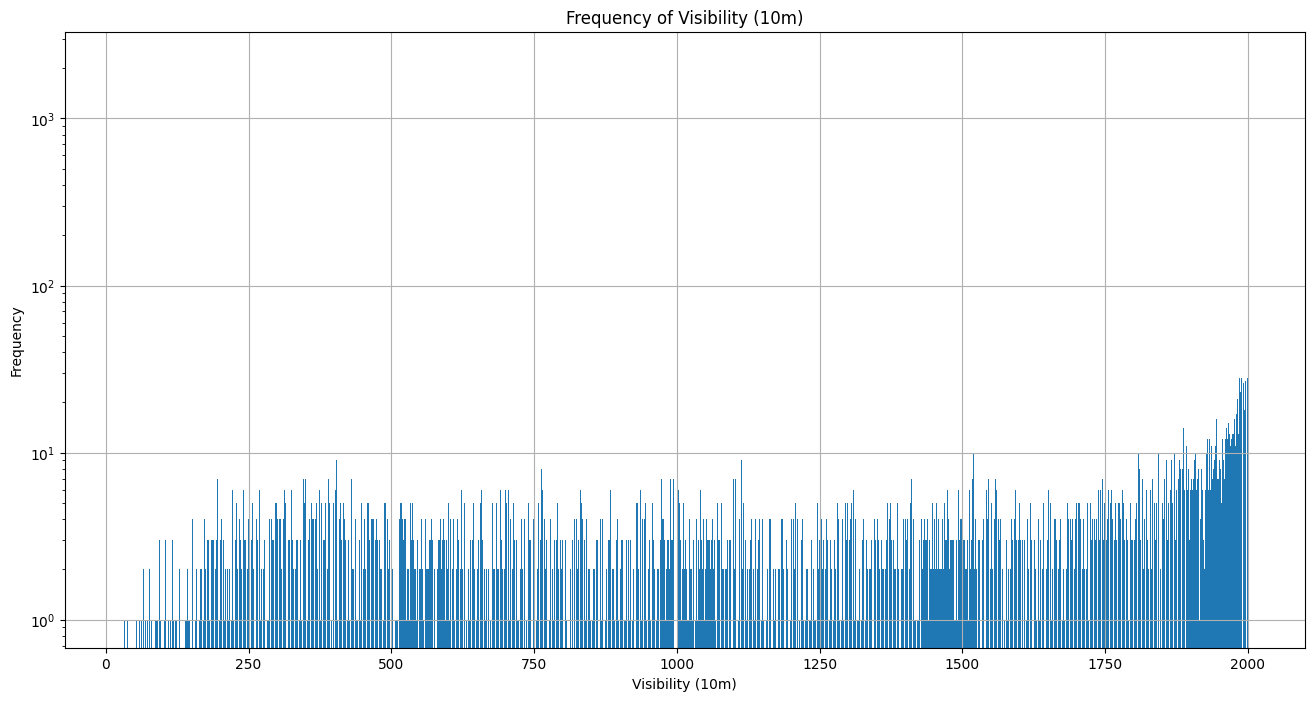

In [21]:
plt.figure(figsize=(16,8))
plt.bar(visibility_count.index,visibility_count.values)
plt.xlabel('Visibility (10m)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Frequency of Visibility (10m)')
plt.grid(True)
plt.show()
#

## Dew point temperature(°C)

In [22]:
df['Dew point temperature(°C)'].describe()

,Dew point temperature(°C)
count,8760.000000
mean,4.073813
std,13.060369
min,-30.600000
25%,-4.700000
50%,5.100000
75%,14.800000
max,27.200000


In [23]:
dew_point_count=df['Dew point temperature(°C)'].value_counts()
dew_point_count

,count
Dew point temperature(°C),
0.0,60
21.1,43
14.3,40
21.2,40
8.9,39
...,...
26.3,1
26.6,1
25.9,1


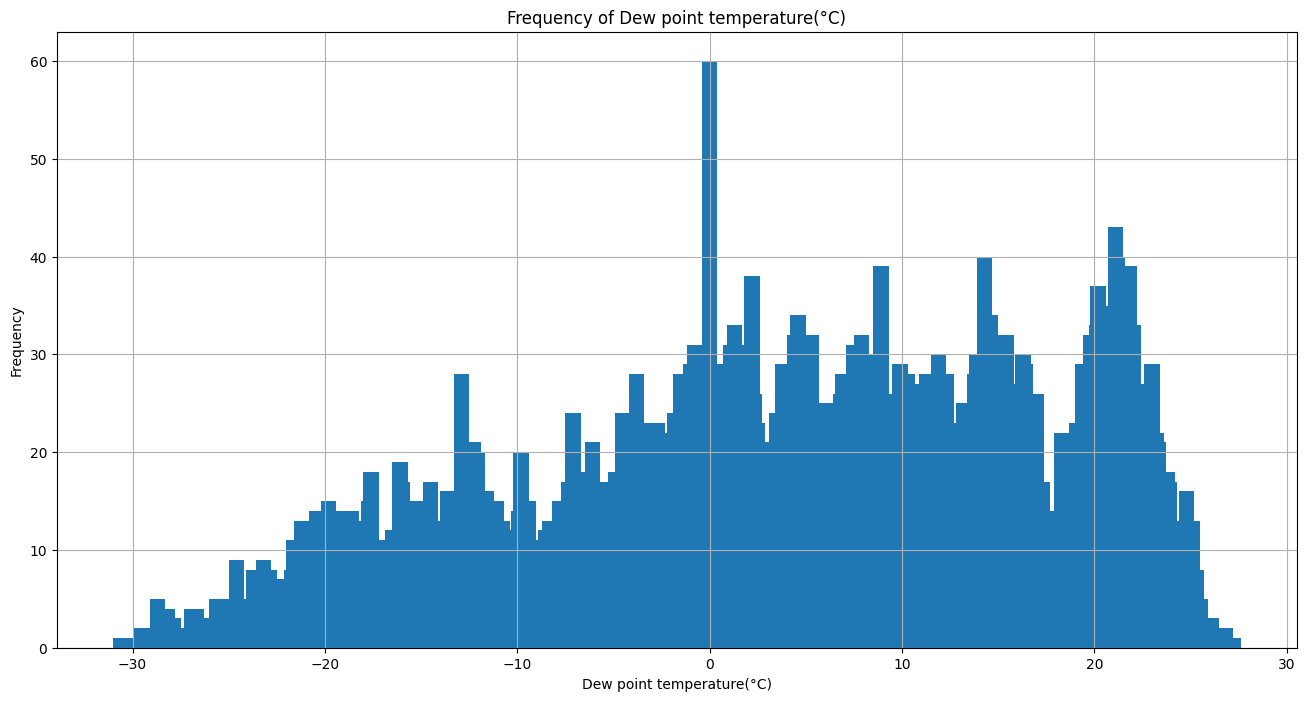

In [24]:
plt.figure(figsize=(16,8))
plt.bar(dew_point_count.index,dew_point_count.values)
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Frequency')
plt.title('Frequency of Dew point temperature(°C)')
plt.grid(True)
plt.show()


## Solar Radiation (MJ/m2)

In [25]:
df['Solar Radiation (MJ/m2)'].describe()

,Solar Radiation (MJ/m2)
count,8760.000000
mean,0.569111
std,0.868746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.930000
max,3.520000


In [26]:
solar_count=df['Solar Radiation (MJ/m2)'].value_counts()
solar_count

,count
Solar Radiation (MJ/m2),
0.00,4300
0.01,128
0.02,82
0.03,69
0.06,61
...,...
3.44,1
3.38,1
2.69,1


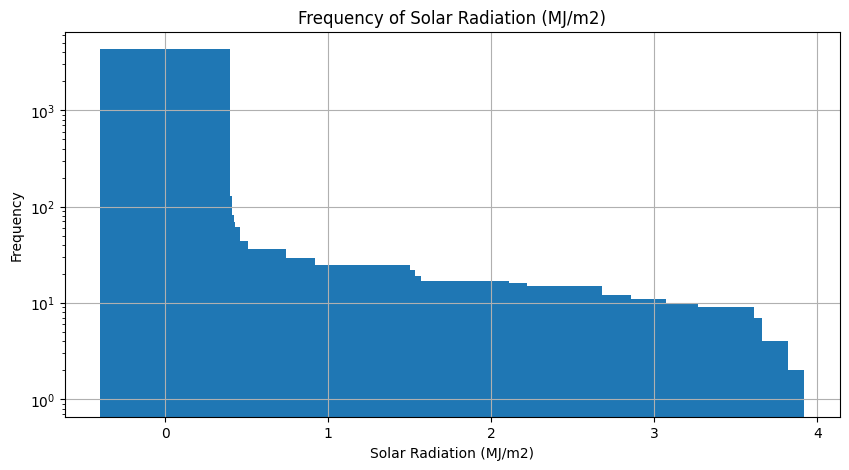

In [27]:
plt.figure(figsize=(10,5))
plt.bar(solar_count.index,solar_count.values)
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Frequency of Solar Radiation (MJ/m2)')
plt.grid(True)
plt.show()


## Rainfall(mm)

In [28]:
df['Rainfall(mm)'].describe()

,Rainfall(mm)
count,8760.000000
mean,0.148687
std,1.128193
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,35.000000


In [29]:
rainfall_count=df['Rainfall(mm)'].value_counts()
rainfall_count

,count
Rainfall(mm),
0.0,8232
0.5,116
1.0,66
1.5,56
0.1,46
...,...
15.5,1
21.0,1
1.2,1


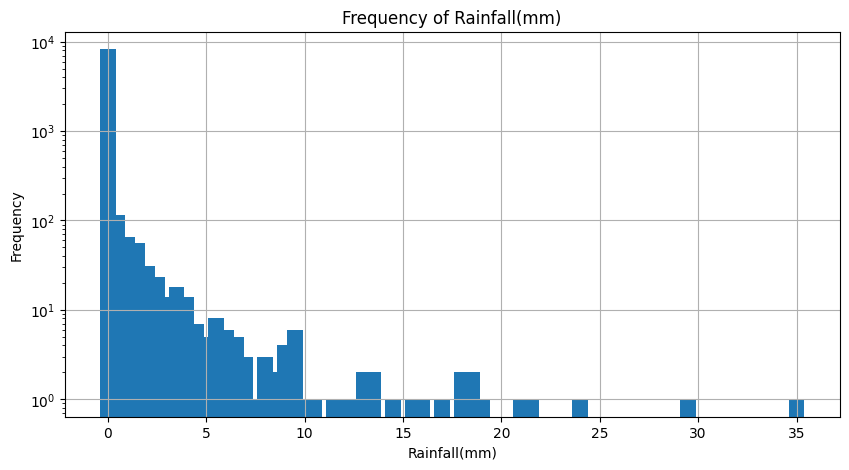

In [30]:
plt.figure(figsize=(10,5))
plt.bar(rainfall_count.index,rainfall_count.values)
plt.xlabel('Rainfall(mm)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Frequency of Rainfall(mm)')
plt.grid(True)
plt.show()

## Snowfall (cm)

In [31]:
df['Snowfall (cm)'].describe()

,Snowfall (cm)
count,8760.000000
mean,0.075068
std,0.436746
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,8.800000


In [32]:
snowfall_count=df['Snowfall (cm)'].value_counts()
snowfall_count

,count
Snowfall (cm),
0.0,8317
0.3,42
1.0,39
0.5,34
0.9,34
0.7,31
0.8,22
2.0,22
0.4,21


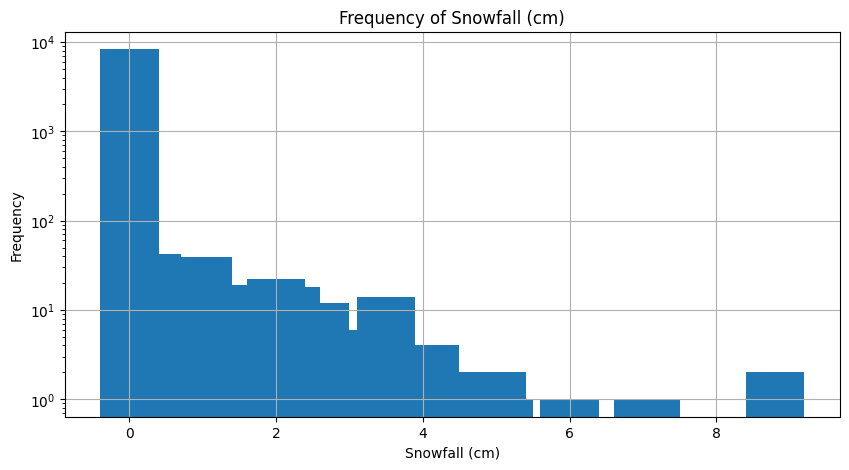

In [33]:
plt.figure(figsize=(10,5))
plt.bar(snowfall_count.index,snowfall_count.values)
plt.xlabel('Snowfall (cm)')
plt.ylabel('Frequency')
plt.yscale('log')
plt.title('Frequency of Snowfall (cm)')
plt.grid(True)
plt.show()

## Seasons

In [34]:
df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [35]:
seasons=df['Seasons'].value_counts()
seasons

,count
Seasons,
Spring,2208
Summer,2208
Autumn,2184
Winter,2160


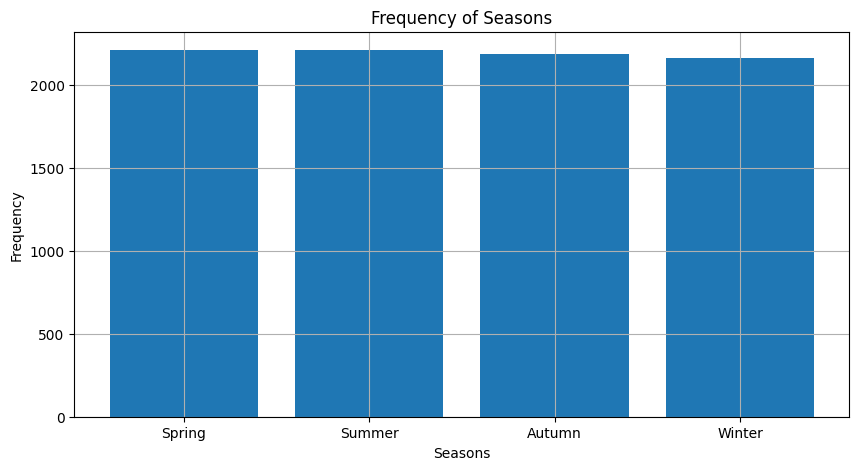

In [36]:
plt.figure(figsize=(10,5))
plt.bar(seasons.index,seasons.values)
plt.xlabel('Seasons')
plt.ylabel('Frequency')
plt.title('Frequency of Seasons')
plt.grid(True)
plt.show()


## Holiday

In [37]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [38]:
holiday=df['Holiday'].value_counts()
holiday

,count
Holiday,
No Holiday,8328
Holiday,432


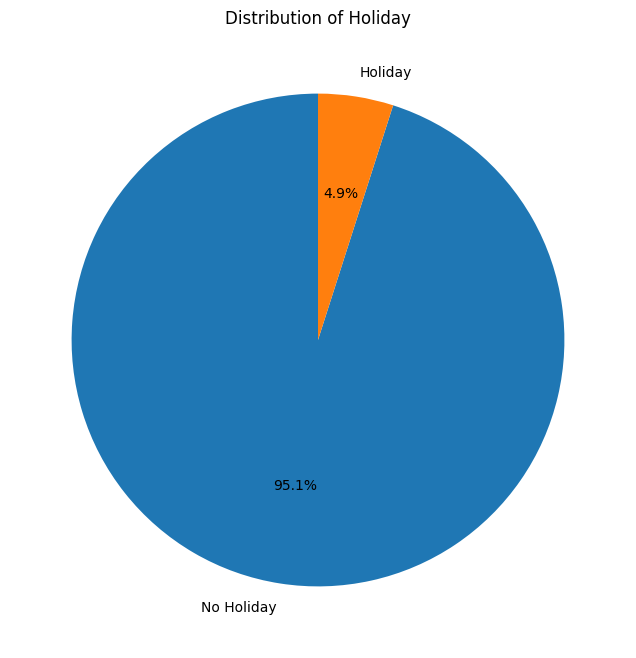

In [39]:


plt.figure(figsize=(8, 8))
plt.pie(holiday.values, labels=holiday.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Holiday')
plt.show()

## Functioning Day

In [40]:
df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
fday=df['Functioning Day'].value_counts()
fday

,count
Functioning Day,
Yes,8465
No,295


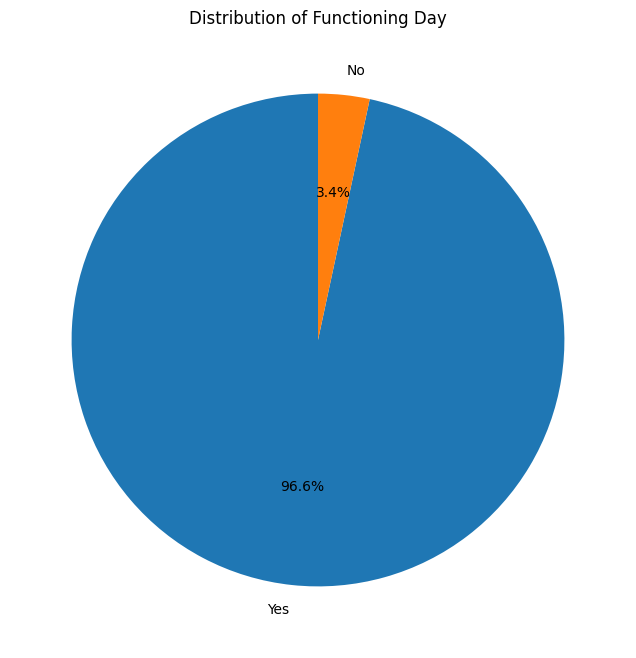

In [42]:
plt.figure(figsize=(8, 8))
plt.pie(fday.values, labels=fday.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Functioning Day')
plt.show()

## datetime

In [43]:
from datetime import datetime
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%Y')
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: Date
Non-Null Count  Dtype         
--------------  -----         
8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


In [44]:
df['day_of_week']=df['Date'].dt.day_name()
df['day_of_week']

,day_of_week
0,Friday
1,Friday
2,Friday
3,Friday
4,Friday
...,...
8755,Friday
8756,Friday
8757,Friday
8758,Friday


In [45]:
df['day_of_week'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [46]:
day_count=df['day_of_week'].value_counts()
day_count

,count
day_of_week,
Friday,1272
Saturday,1248
Sunday,1248
Monday,1248
Tuesday,1248
Wednesday,1248
Thursday,1248


## hour

In [47]:
df['Hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [48]:
hour_count=df['Hour'].value_counts()
hour_count

,count
Hour,
0,365
1,365
2,365
3,365
4,365
5,365
6,365
7,365
8,365


## multivariate

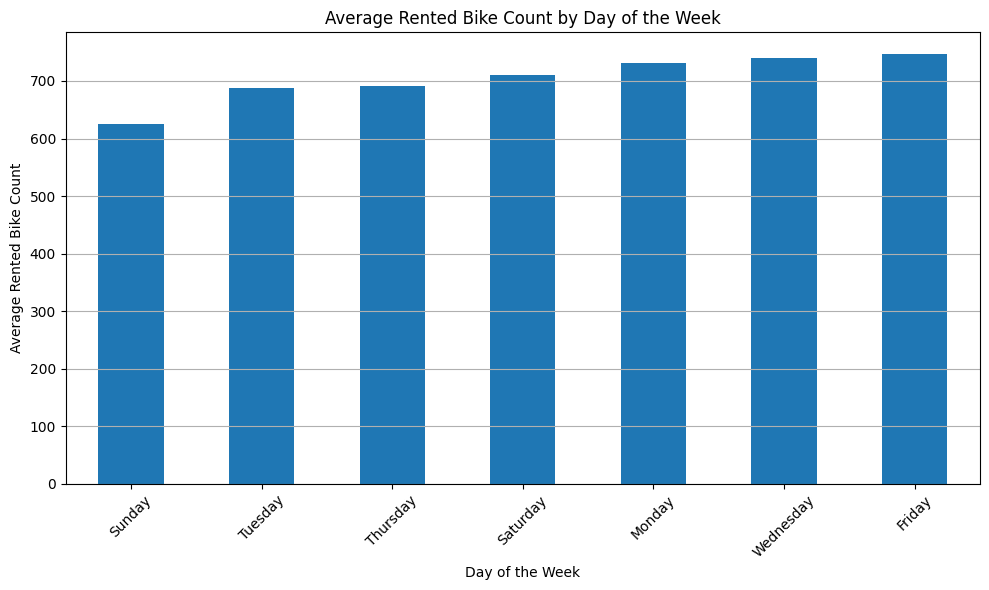

In [49]:

plt.figure(figsize=(10, 6))
df.groupby('day_of_week')['Rented Bike Count'].mean().sort_values().plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

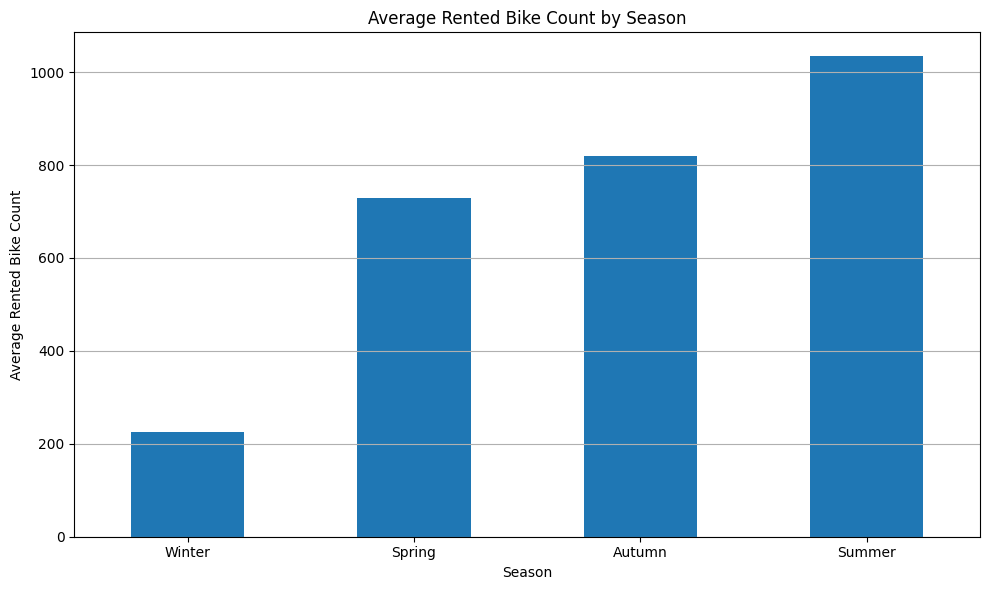

In [50]:


plt.figure(figsize=(10, 6))
df.groupby('Seasons')['Rented Bike Count'].mean().sort_values().plot(kind='bar')
plt.xlabel('Season')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count by Season')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

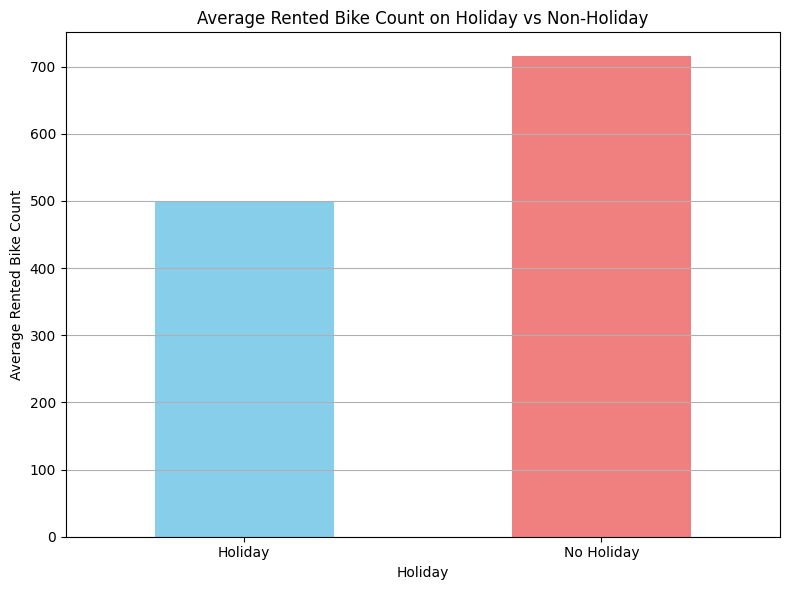

In [51]:


plt.figure(figsize=(8, 6))
df.groupby('Holiday')['Rented Bike Count'].mean().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.xlabel('Holiday')
plt.ylabel('Average Rented Bike Count')
plt.title('Average Rented Bike Count on Holiday vs Non-Holiday')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## preprocessing

In [52]:
df=df.drop(columns=['Date'])

In [53]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day_of_week'],
      dtype='object')

In [54]:
y=df['Rented Bike Count']


In [55]:
x=df[['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day_of_week']]

In [56]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Friday


In [57]:
from sklearn.preprocessing import OneHotEncoder
season_encoder=OneHotEncoder()
season_encoded=season_encoder.fit_transform(x[['Seasons']])
season_encoded_df = pd.DataFrame(season_encoded.toarray(), columns=season_encoder.get_feature_names_out(['Seasons']))
x = pd.concat([x.drop(columns=['Seasons']), season_encoded_df], axis=1)

In [58]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,day_of_week,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,Friday,0.0,0.0,0.0,1.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,Friday,0.0,0.0,0.0,1.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,No Holiday,Yes,Friday,0.0,0.0,0.0,1.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,No Holiday,Yes,Friday,0.0,0.0,0.0,1.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,No Holiday,Yes,Friday,0.0,0.0,0.0,1.0


In [59]:
from sklearn.preprocessing import OneHotEncoder
season_encoder=OneHotEncoder()
season_encoded=season_encoder.fit_transform(x[['Holiday']])
season_encoded_df = pd.DataFrame(season_encoded.toarray(), columns=season_encoder.get_feature_names_out(['Holiday']))
x = pd.concat([x.drop(columns=['Holiday']), season_encoded_df], axis=1)

In [60]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,day_of_week,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes,Friday,0.0,0.0,0.0,1.0,0.0,1.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes,Friday,0.0,0.0,0.0,1.0,0.0,1.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes,Friday,0.0,0.0,0.0,1.0,0.0,1.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes,Friday,0.0,0.0,0.0,1.0,0.0,1.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes,Friday,0.0,0.0,0.0,1.0,0.0,1.0


In [61]:
from sklearn.preprocessing import OneHotEncoder
season_encoder=OneHotEncoder()
season_encoded=season_encoder.fit_transform(x[['Functioning Day']])
season_encoded_df = pd.DataFrame(season_encoded.toarray(), columns=season_encoder.get_feature_names_out(['Functioning Day']))
x = pd.concat([x.drop(columns=['Functioning Day']), season_encoded_df], axis=1)

In [62]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day_of_week,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Friday,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Friday,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Friday,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Friday,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Friday,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [63]:
x=x.drop(columns=['Holiday_Holiday','Functioning Day_No'])

In [64]:
day_order={
    'Monday':0,
    'Tuesday':1,
    'Wednesday':2,
    'Thursday':3,
    'Friday':4,
    'Saturday':5,
    'Sunday':6
}
x['day_of_week']=x['day_of_week'].map(day_order)

In [65]:
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day_of_week,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0.0,0.0,0.0,1.0,1.0,1.0
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0.0,0.0,0.0,1.0,1.0,1.0
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0.0,0.0,0.0,1.0,1.0,1.0
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0.0,0.0,0.0,1.0,1.0,1.0
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0.0,0.0,0.0,1.0,1.0,1.0


In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x1=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x1.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),day_of_week,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes
0,0.000000,0.220280,0.377551,0.297297,1.0,0.224913,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,1.0,1.0,1.0
1,0.043478,0.215035,0.387755,0.108108,1.0,0.224913,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,1.0,1.0,1.0
2,0.086957,0.206294,0.397959,0.135135,1.0,0.223183,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,1.0,1.0,1.0
3,0.130435,0.202797,0.408163,0.121622,1.0,0.224913,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,1.0,1.0,1.0
4,0.173913,0.206294,0.367347,0.310811,1.0,0.207612,0.0,0.0,0.0,0.666667,0.0,0.0,0.0,1.0,1.0,1.0


## moddel training

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_temp,y_train,y_temp=train_test_split(x1,y,test_size=0.4,random_state=42)
x_val,x_test,y_val,y_test=train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [68]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
linear.fit(x_train, y_train)

LinearRegression()

In [69]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
linear_pred=linear.predict(x_val)
mse=mean_squared_error(linear_pred,y_val)
r2=r2_score(linear_pred,y_val)
mae=mean_absolute_error(linear_pred,y_val)
print('mean squared error:', mse)
print('r2 score:',r2)
print('mean absolute error:',mae)

mean squared error: 195845.51367129685
r2 score: 0.14229129196326884
mean absolute error: 327.8373696204249


In [70]:
from sklearn.tree import DecisionTreeRegressor
decisiontree=DecisionTreeRegressor()
decisiontree.fit(x_train,y_train)

DecisionTreeRegressor()

In [71]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
decision_pred=decisiontree.predict(x_val)
mse=mean_squared_error(decision_pred,y_val)
r2=r2_score(decision_pred,y_val)
mae=mean_absolute_error(decision_pred,y_val)
print('mean squared error:', mse)
print('r2 score:',r2)
print('mean absolute error:',mae)

mean squared error: 72993.6598173516
r2 score: 0.8273634022795289
mean absolute error: 150.10730593607306


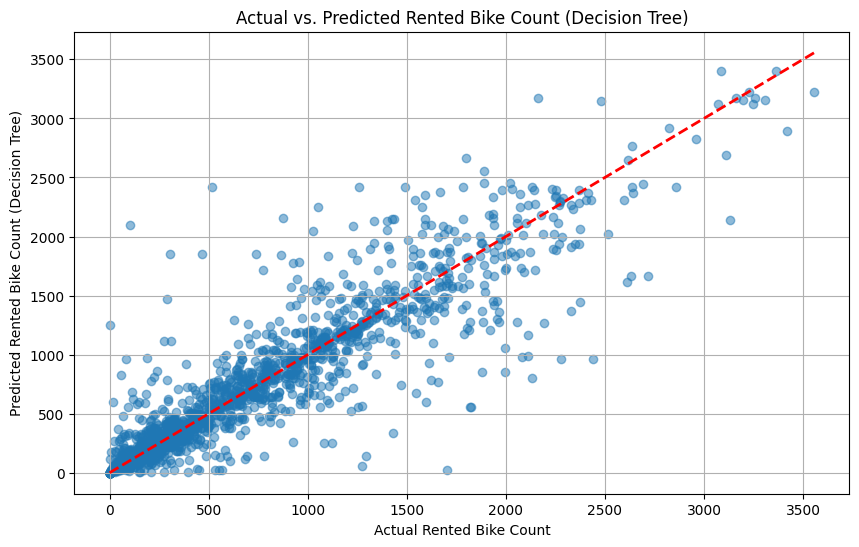

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, decision_pred, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Predicted Rented Bike Count (Decision Tree)")
plt.title("Actual vs. Predicted Rented Bike Count (Decision Tree)")
plt.grid(True)
plt.show()